<img height="60" width="120" src="https://shwetkm.github.io/upxlogo.png"></img>
# Machine Learning Projects
# Customer Segmentation

### Table of Contents

1. [Dataset Description](#customer)
2. [Importing the packages and dataset](#packages)
3. [Exploring the dataset](#explore)
4. [Checking for null values](#null)
5. [Data Visualizations](#dv)
6. [Scaling](#s)
7. [K Means Clustering](#kmeans)
     - 7.1 [Finding optimum clusters for K Means](#oc)
     - 7.2 [Fitting the K Means model after finding clusters](#knnmodel)
     - 7.3 [Clusters output](#co)
     - 7.4 [Cluster centroid plot](#ccp)
8. [Joining the clusters into dataset as Customer Group](#cg)

## Supermarket dataset

### 1. Dataset Description  <a id='customer'>
**Objective**
The objective is to Cluster customers into different segments or groups based on the attributes given using clustering algorithms.

**Column Descriptions**

1. Customer_ID – id of customer

2. AVG_Actual_price_12 – MRP

3. Purchase_Value – Total amount of purchase customer has made

4. No_of_Items – Number of items bought

5. Total_Discount- Discount availed by each customer

6. MONTH_SINCE_LAST_TRANSACTION – Last month of visit in supermarket

### 2. Importing the packages and dataset  <a id='packages'>

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the CSV file
supermarket = pd.read_csv('Supermarket Purchase.csv')

### 3. Exploring the dataset  <a id='explore'>

In [3]:
# Getting the head of the dataset
supermarket.head()

,Cust_id,AVG_Actual_price_12,Purchase_Value,No_of_Items,Total_Discount,MONTH_SINCE_LAST_TRANSACTION
0,1,300.000000,1200.00,4,0.00,11
1,2,2563.282500,41012.52,16,78737.48,2
2,4,3510.000000,7020.00,2,780.00,4
3,8,4530.000000,13590.00,3,1510.00,1
4,9,2428.076923,33455.00,15,17445.00,6


In [4]:
# Getting the shape of the dataset
supermarket.shape

(702, 6)

In [5]:
# Getting the info of the dataset
supermarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 6 columns):
Cust_id                         702 non-null int64
AVG_Actual_price_12             702 non-null float64
Purchase_Value                  702 non-null float64
No_of_Items                     702 non-null int64
Total_Discount                  702 non-null float64
MONTH_SINCE_LAST_TRANSACTION    702 non-null int64
dtypes: float64(3), int64(3)
memory usage: 33.0 KB


**Descriptive Statistics**

In [6]:
supermarket.describe()

,Cust_id,AVG_Actual_price_12,Purchase_Value,No_of_Items,Total_Discount,MONTH_SINCE_LAST_TRANSACTION
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000
mean,501.414530,2642.877917,19820.633305,10.720798,20806.339088,5.029915
std,295.756706,1879.138285,34639.752609,20.038311,58427.798572,3.562840
min,1.000000,22.500000,45.000000,1.000000,-3962.480000,1.000000
25%,245.750000,1238.750000,4200.000000,2.000000,0.000000,2.000000
50%,486.500000,2100.000000,8660.000000,4.000000,2599.250000,4.000000
75%,763.750000,3700.000000,21197.000000,10.000000,17433.750000,8.000000
max,1006.000000,10000.000000,302721.740000,172.000000,734349.820000,12.000000


**As the range of max-min is different for each column so we should scale the dataset before moving to the cluster analysis**

In [7]:
# Value counts for MONTH_SINCE_LAST_TRANSACTION column
supermarket['MONTH_SINCE_LAST_TRANSACTION'].value_counts()

1     152
2      86
3      63
5      62
4      62
7      54
11     48
6      43
8      40
12     38
10     34
9      20
Name: MONTH_SINCE_LAST_TRANSACTION, dtype: int64

### 4. Checking for null values  <a id='null'>

In [8]:
supermarket.isnull().sum()

Cust_id                         0
AVG_Actual_price_12             0
Purchase_Value                  0
No_of_Items                     0
Total_Discount                  0
MONTH_SINCE_LAST_TRANSACTION    0
dtype: int64

**We could there no null values present in the dataset**

### 5. Data Visualizations<a id='dv'>

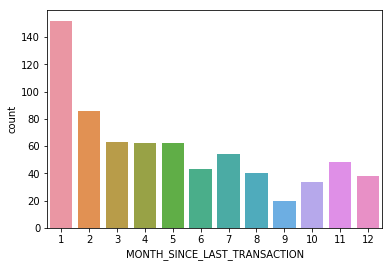

In [12]:
# Countplot for MONTH_SINCE_LAST_TRANSACTION
sns.countplot(x=supermarket['MONTH_SINCE_LAST_TRANSACTION'])

**We could see that for most of the customers there is maximum one month delay and they might have continued their purchase after this time period**

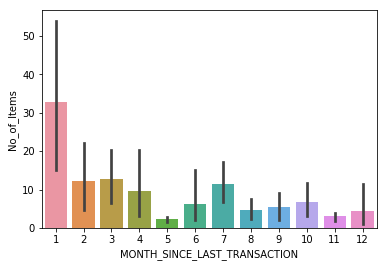

In [35]:
# Barplot for MONTH_SINCE_LAST_TRANSACTION VS No_of_Items
sns.barplot(x='MONTH_SINCE_LAST_TRANSACTION',y='No_of_Items',data=supermarket.head(100))

**We could see the customers who had one month lag bought more items compared to other lag customers so we could say that the no of items influence the customers but lets find out for what reason the customers bought so many items**

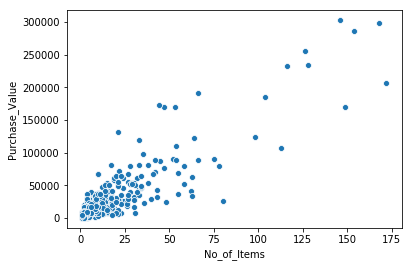

In [37]:
# Scatter plot for No_of_Items vs Purchase Value
sns.scatterplot(x='No_of_Items',y='Purchase_Value',data=supermarket)

**We could see Purchase Value and No_of_Items have a positive linear relationship with each other so with increase in Purchase Value the No_of_Items increases**

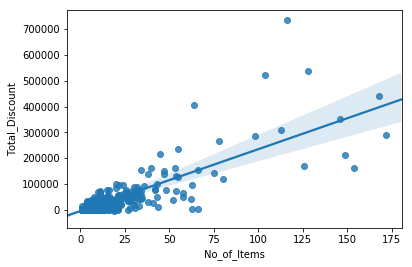

In [30]:
# Regression plot for No_of_Items vs Total Discount
sns.regplot(x='No_of_Items',y='Total_Discount',data=supermarket)

**We could see Total_Discount and No_of_Items are in a positive linear relationship which means when Total_Discount increases the No_of_Items also increases,so this is the reason for more Items to bought by customers**

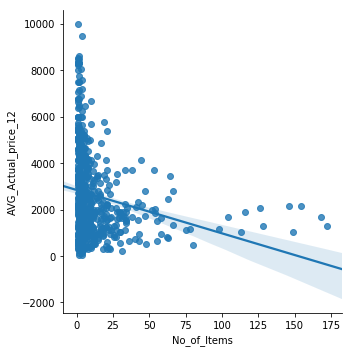

In [31]:
# Linear Regression plot for No_of_Items vs Average price
sns.lmplot(x='No_of_Items',y='AVG_Actual_price_12',data=supermarket)

**We could find that with increase in No_of_Items the Average price is decreasing it may be due to the Discounts given to all the items**

### 6. Scaling  <a id='s'>

In [76]:
# Importing StandardScaler and scaling the dataset
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
supermarket_scaled = ss.fit_transform(supermarket)

### 7. K Means Clustering  <a id='kmeans'>

### 7.1 Finding optimum clusters for K Means  <a id='oc'>

In [77]:
# Using sum of squares method to find optimum no of clusters
from sklearn.cluster import KMeans

ssw=[]
cluster_range=range(1,10)
for i in cluster_range:
    model=KMeans(n_clusters=i,init="k-means++",n_init=10, max_iter=300, random_state=0)
    model.fit(supermarket_scaled)
    ssw.append(model.inertia_)

In [78]:
# Dataframe of the clusters and ssw
ssw_df=pd.DataFrame({"no. of clusters":cluster_range,"SSW":ssw})
print(ssw_df)

   no. of clusters          SSW
0                1  4914.000000
1                2  3616.570827
2                3  2781.214750
3                4  2269.349792
4                5  1878.963166
5                6  1556.594600
6                7  1253.139434
7                8  1182.740386
8                9  1137.905266


**Elbow Plot**

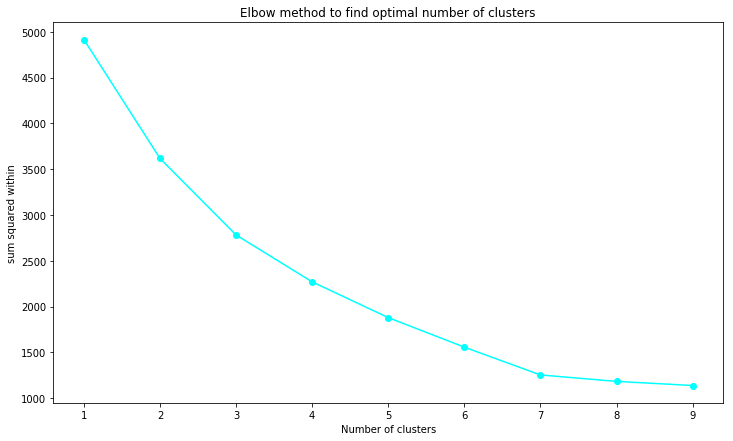

In [79]:
# Elbow plot to find optimum no of clusters
plt.figure(figsize=(12,7))
plt.plot(cluster_range, ssw, marker = "o",color="cyan")
plt.xlabel("Number of clusters")
plt.ylabel("sum squared within")
plt.title("Elbow method to find optimal number of clusters")
plt.show()

### 7.2 Fitting the K Means model after finding optimum clusters <a id='kmeansmodel'>

In [80]:
# Fitting the model
kmeans = KMeans(n_clusters = 7, init='k-means++', max_iter=300, n_init=10, random_state=0)
# Fit the model
k_model=kmeans.fit(supermarket_scaled)

### 7.3 Clusters output   <a id='co'>

In [81]:
## It returns the cluster vectors i.e. showing observations belonging which clusters 
clusters=k_model.labels_
clusters

array([6, 2, 2, 2, 2, 6, 2, 2, 2, 6, 6, 2, 2, 1, 5, 2, 4, 2, 2, 2, 6, 6,
       6, 1, 6, 2, 6, 1, 2, 2, 6, 6, 4, 5, 5, 2, 2, 2, 6, 6, 6, 1, 6, 2,
       6, 2, 2, 6, 2, 6, 1, 2, 6, 2, 1, 2, 2, 5, 2, 6, 2, 5, 5, 5, 6, 6,
       6, 4, 6, 2, 2, 2, 2, 2, 6, 6, 2, 5, 6, 6, 2, 6, 5, 1, 6, 2, 6, 6,
       2, 2, 1, 1, 2, 6, 5, 2, 6, 5, 2, 6, 2, 1, 6, 2, 2, 5, 2, 6, 2, 2,
       6, 2, 2, 2, 2, 1, 6, 6, 6, 6, 1, 2, 6, 2, 5, 2, 6, 2, 6, 6, 6, 2,
       2, 2, 2, 2, 6, 5, 2, 2, 5, 6, 2, 5, 6, 2, 6, 2, 6, 6, 2, 6, 2, 2,
       6, 6, 6, 6, 6, 5, 2, 2, 6, 1, 5, 6, 2, 2, 5, 2, 6, 2, 5, 2, 2, 2,
       2, 2, 2, 6, 6, 2, 5, 6, 2, 5, 6, 2, 5, 6, 5, 6, 6, 6, 2, 2, 2, 6,
       2, 1, 2, 2, 2, 6, 6, 1, 2, 6, 6, 2, 2, 6, 5, 2, 2, 6, 2, 6, 2, 2,
       2, 6, 2, 6, 2, 2, 1, 6, 6, 5, 2, 2, 5, 5, 2, 5, 6, 2, 2, 6, 2, 5,
       6, 2, 6, 2, 2, 2, 6, 5, 2, 5, 6, 2, 1, 6, 6, 6, 2, 5, 6, 2, 2, 2,
       6, 2, 6, 4, 2, 6, 6, 6, 6, 2, 4, 4, 1, 6, 6, 2, 6, 6, 2, 6, 2, 6,
       6, 6, 4, 2, 2, 2, 2, 5, 6, 2, 6, 2, 2, 2, 1,

### 7.4 Cluster centroid plot   <a id='ccp'>

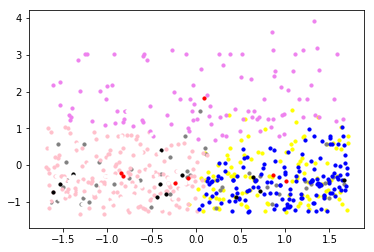

In [85]:
# Predicting the values
y_kmeans = kmeans.fit_predict(supermarket_scaled)

#visualizing the clusters

plt.scatter(supermarket_scaled[y_kmeans == 0, 0], supermarket_scaled[y_kmeans == 0, 1], s = 10, c = 'yellow')
plt.scatter(supermarket_scaled[y_kmeans == 1, 0], supermarket_scaled[y_kmeans == 1, 1], s = 10, c = 'grey')
plt.scatter(supermarket_scaled[y_kmeans == 2, 0], supermarket_scaled[y_kmeans == 2, 1], s = 10, c = 'pink')
plt.scatter(supermarket_scaled[y_kmeans == 3, 0], supermarket_scaled[y_kmeans == 3, 1], s = 10, c = 'blue')
plt.scatter(supermarket_scaled[y_kmeans == 4, 0], supermarket_scaled[y_kmeans == 4, 1], s = 10, c = 'black')
plt.scatter(supermarket_scaled[y_kmeans == 5, 0], supermarket_scaled[y_kmeans == 5, 1], s = 10, c = 'violet')
plt.scatter(supermarket_scaled[y_kmeans == 6, 0], supermarket_scaled[y_kmeans == 6, 1], s = 10, c = 'white')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 10, c = 'red', label = 'centroids')

### 8. Joining clusters into the dataset as Customer Group <a id='cg'>

In [86]:
# Converting the clusters into DataFrame
clusters = pd.DataFrame(clusters)

In [92]:
# Output of clusters
clusters[0].value_counts()

2    162
3    142
6    128
0    111
5    103
1     44
4     12
Name: 0, dtype: int64

In [88]:
# Joining the clusters into the supermarket dataset
supermarket['Customer Group'] = clusters

In [89]:
# Getting the head of the dataset
supermarket.head()

,Cust_id,AVG_Actual_price_12,Purchase_Value,No_of_Items,Total_Discount,MONTH_SINCE_LAST_TRANSACTION,Customer Group
0,1,300.000000,1200.00,4,0.00,11,6
1,2,2563.282500,41012.52,16,78737.48,2,2
2,4,3510.000000,7020.00,2,780.00,4,2
3,8,4530.000000,13590.00,3,1510.00,1,2
4,9,2428.076923,33455.00,15,17445.00,6,2


In [90]:
# Value counts for the clusters
supermarket['Customer Group'].value_counts()

2    162
3    142
6    128
0    111
5    103
1     44
4     12
Name: Customer Group, dtype: int64